<a href="https://colab.research.google.com/github/Rakesshreghu/datascience/blob/main/level_1_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv(r"/content/iris.csv")

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
X=data.drop("species",axis=1)

In [ ]:
y=data['species']

In [ ]:
# preprocessing include converting label to numerical and feature scaling
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_enc=LabelEncoder()
st_scale=StandardScaler()


In [ ]:

# Encode categorical target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
 from sklearn.linear_model import LogisticRegression
 log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_curve,roc_curve,roc_auc_score,confusion_matrix,classification_report,auc

=== Logistic Regression ===
Accuracy: 0.9333333333333333

Classification Report (Precision, Recall, F1):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


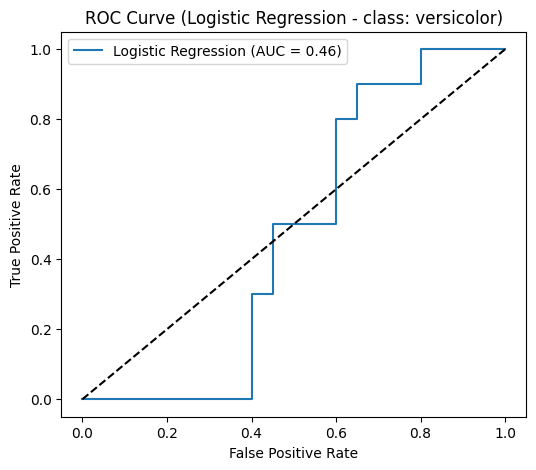

In [ ]:
# ====================== LOGISTIC REGRESSION ======================
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report (Precision, Recall, F1):\n",
      classification_report(y_test, y_pred_log, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

# ROC Curve (One-vs-Rest example for class 1: versicolor)
y_prob_log = log_reg.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob_log[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression - class: versicolor)")
plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Precision, Recall, F1):\n",
      classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))


 Random Forest
Accuracy: 0.9

Classification Report (Precision, Recall, F1):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [ ]:
# ====================== SVM ======================
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report (Precision, Recall, F1):\n",
      classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))



=== SVM ===
Accuracy: 0.9666666666666667

Classification Report (Precision, Recall, F1):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

